# Part 1: Data Preparation and Exploration

### 1. Data Preparation:

In [1]:
import pandas as pd
df=pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


### 2. Exploratory Data Analysis (EDA):

In [2]:
df.shape, df.columns

((7588, 2), Index(['date', 'Ex_rate'], dtype='object'))

In [3]:
df.nunique()

date       7588
Ex_rate    5330
dtype: int64

In [4]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [5]:
# Check for Numeric columns and Categorical columns
num_col = df.select_dtypes(include=['number']).columns
cat_col=df.select_dtypes(include=['object']).columns
print("Numeric columns are: ", num_col)
print("Categorical columns are: ", cat_col)

Numeric columns are:  Index(['Ex_rate'], dtype='object')
Categorical columns are:  Index(['date'], dtype='object')


In [6]:
# Handle missing values appropriately (e.g., imputation, deletion).
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df_new=df.corr(numeric_only = True)
df_new

,Ex_rate
Ex_rate,1.0


In [8]:
# fillna function in python (in pandas library) fills missing values in data frame
# replces missing valuse in a column or columns with a specified value
df_new = df.fillna(" ")
df_new

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [9]:
df_new.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [10]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [11]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [12]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

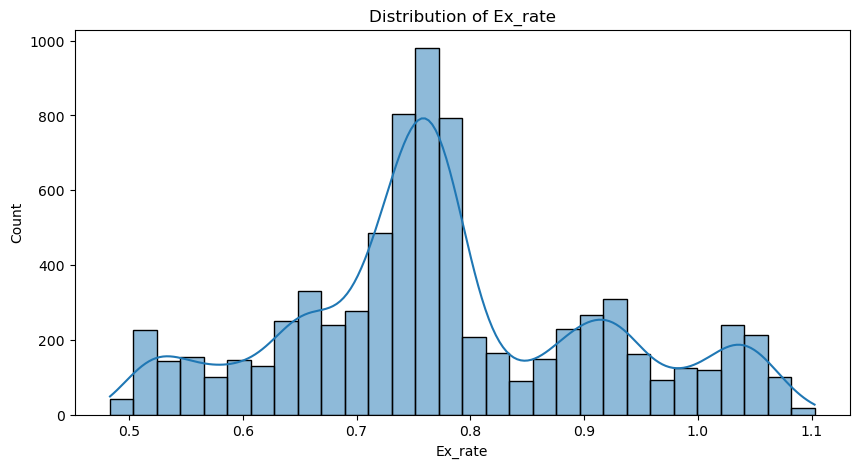

In [14]:
# Histograms
for i in df_new.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df_new[i], bins =30, kde=True)
  plt.title(f"Distribution of {i}")
  plt.show()

<Axes: >

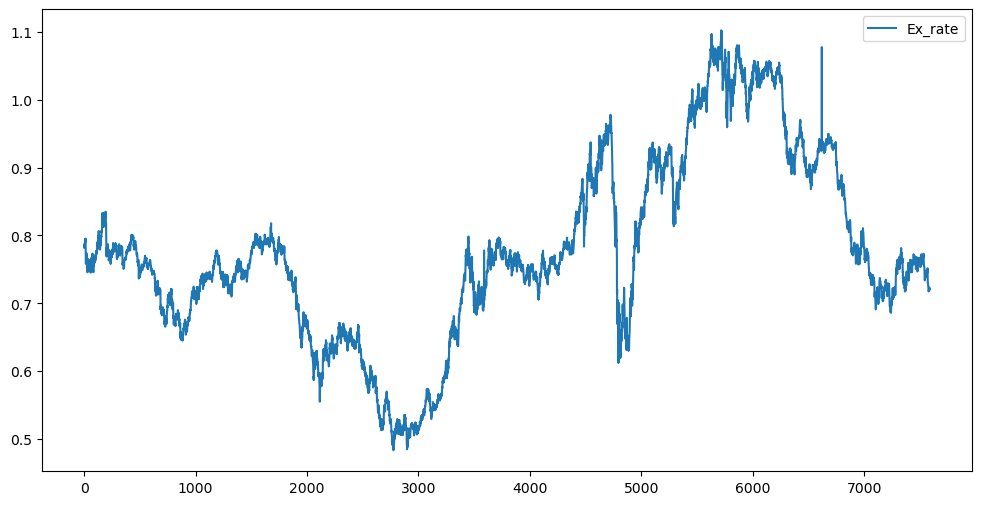

In [15]:
df.plot(figsize=(12,6))
#15=length,8=width

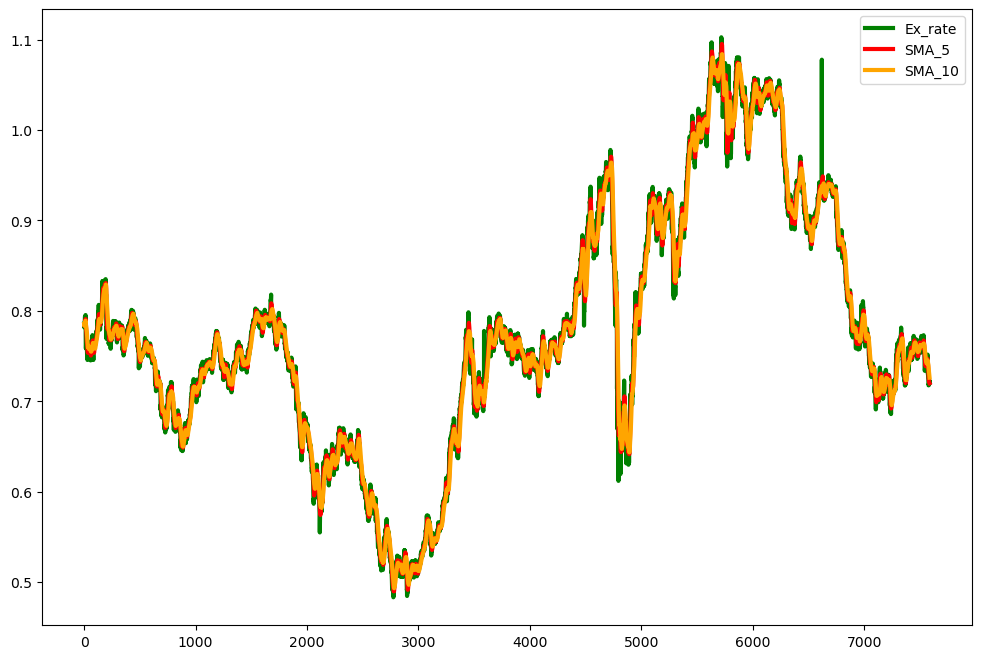

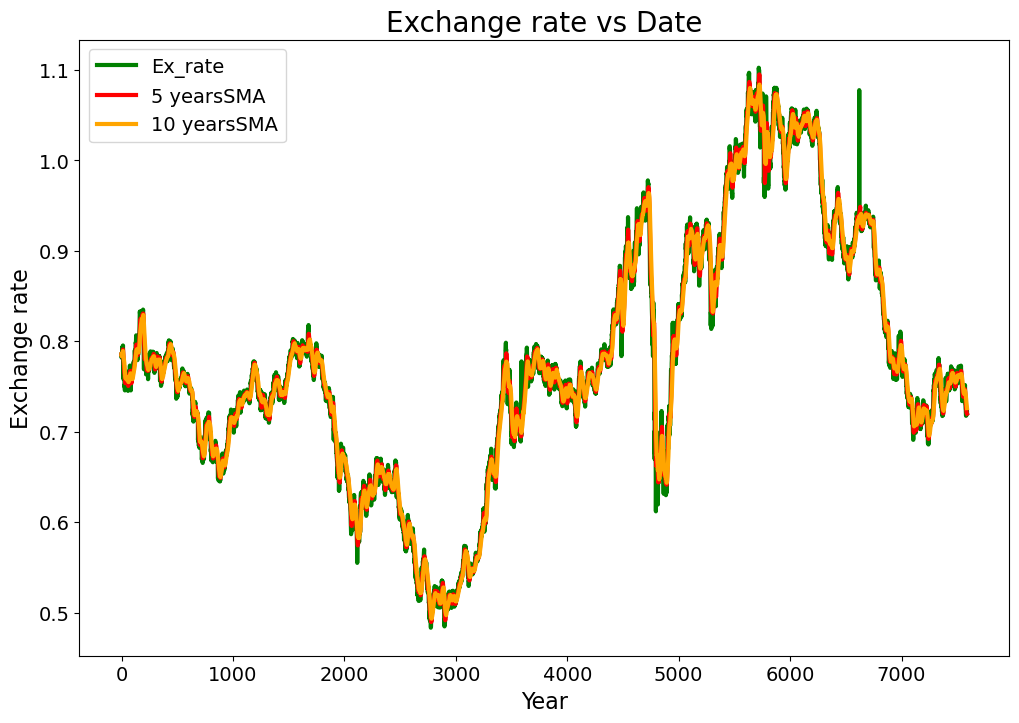

In [16]:
# Time series(Stationary and Non stationary)
#.rolling referes to creating a moving window of data to perform calculations
#and analyze trends or patterns over time allowing for dynamic insights into how data changes
df['SMA_5']=df.Ex_rate.rolling(10,min_periods=1).mean()
df['SMA_10']=df.Ex_rate.rolling(20,min_periods=1).mean()
colors=["green","red","Orange"]
df[['Ex_rate','SMA_5','SMA_10']].plot(color=colors,linewidth=3,figsize=(12,8))
df.plot(color=colors,linewidth=3,figsize=(12,8))
import matplotlib.pyplot as plt
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Exchange rate',fontsize=16)
plt.title("Exchange rate vs Date",fontsize=20)
plt.legend(labels=['Ex_rate','5 yearsSMA','10 yearsSMA'],fontsize=14)

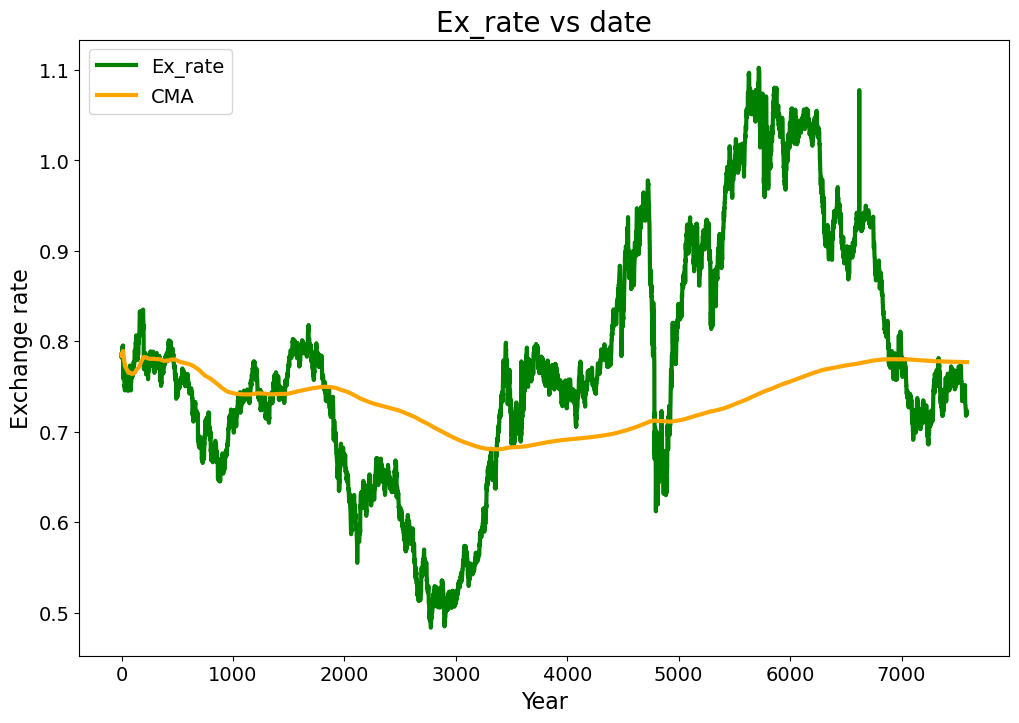

In [17]:
# # Cumulative Moving Average
# .EXPANDING(average of SMA=CMA)
df['CMA']=df.Ex_rate.expanding().mean()
colors=["green","Orange"]
df[['Ex_rate','CMA']].plot(color=colors,linewidth=3,figsize=(12,8))
import matplotlib.pyplot as plt
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Exchange rate',fontsize=16)
plt.title("Ex_rate vs date",fontsize=20)
plt.legend(labels=['Ex_rate','CMA'],fontsize=14)

### 3. Feature Engineering:

In [18]:
!pip install pmdarima
# pmdarima aids to identify the most optimal paramaters for an arima model

In [19]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 5) (30, 5)


In [20]:
print(train)

                  date   Ex_rate     SMA_5    SMA_10       CMA
0     01-01-1990 00:00  0.785500  0.785500  0.785500  0.785500
1     02-01-1990 00:00  0.781800  0.783650  0.783650  0.783650
2     03-01-1990 00:00  0.786700  0.784667  0.784667  0.784667
3     04-01-1990 00:00  0.786000  0.785000  0.785000  0.785000
4     05-01-1990 00:00  0.784900  0.784980  0.784980  0.784980
...                ...       ...       ...       ...       ...
7553  06-09-2010 00:00  0.747831  0.740129  0.746538  0.777167
7554  07-09-2010 00:00  0.746436  0.741354  0.745496  0.777163
7555  08-09-2010 00:00  0.738662  0.741836  0.744453  0.777158
7556  09-09-2010 00:00  0.741125  0.742395  0.743745  0.777154
7557  10-09-2010 00:00  0.744546  0.742959  0.743206  0.777149

[7558 rows x 5 columns]


In [21]:
print (test)

                  date   Ex_rate     SMA_5    SMA_10       CMA
7558  11-09-2010 00:00  0.745796  0.743670  0.742730  0.777145
7559  12-09-2010 00:00  0.745045  0.744037  0.742275  0.777141
7560  13-09-2010 00:00  0.747692  0.744537  0.741972  0.777137
7561  14-09-2010 00:00  0.745601  0.744645  0.741804  0.777133
7562  15-09-2010 00:00  0.747680  0.745041  0.741903  0.777129
7563  16-09-2010 00:00  0.744602  0.744719  0.742424  0.777125
7564  17-09-2010 00:00  0.744158  0.744491  0.742922  0.777120
7565  18-09-2010 00:00  0.745184  0.745143  0.743490  0.777116
7566  19-09-2010 00:00  0.744990  0.745529  0.743962  0.777112
7567  20-09-2010 00:00  0.748951  0.745970  0.744464  0.777108
7568  21-09-2010 00:00  0.749681  0.746358  0.745014  0.777104
7569  22-09-2010 00:00  0.751654  0.747019  0.745528  0.777101
7570  23-09-2010 00:00  0.733999  0.745650  0.745093  0.777095
7571  24-09-2010 00:00  0.730567  0.744147  0.744396  0.777089
7572  25-09-2010 00:00  0.729714  0.742350  0.743696  0

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(train['Ex_rate'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Sat, 26 Apr 2025   AIC                         -55864.938
Time:                        11:50:15   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64
7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.7

C:\DataScience\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

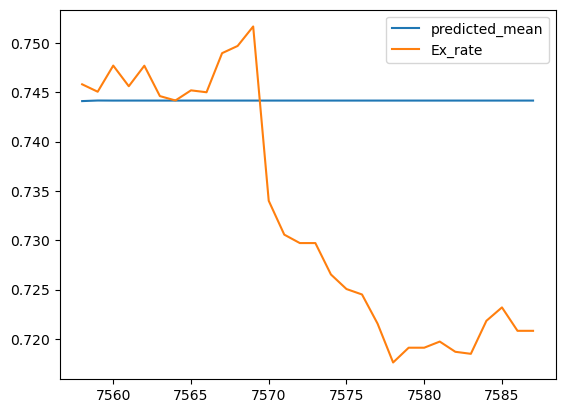

In [25]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [26]:
print(test['Ex_rate'].mean())

0.732738


In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.016634697604867923


In [28]:
model2=ARIMA(df['Ex_rate'],order=(0,0,0))
model2=model2.fit()
df.tail()

,date,Ex_rate,SMA_5,SMA_10,CMA
7583,06-10-2010 00:00,0.718494,0.721043,0.730952,0.777003
7584,07-10-2010 00:00,0.721839,0.720573,0.729836,0.776996
7585,08-10-2010 00:00,0.723197,0.720387,0.728737,0.776988
7586,09-10-2010 00:00,0.720825,0.720019,0.727528,0.776981
7587,10-10-2010 00:00,0.720825,0.719946,0.726122,0.776974


In [29]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred = pred.rename('ARIMA Predictions')
print(pred)

7588    0.776969
7589    0.776969
7590    0.776969
7591    0.776969
7592    0.776969
7593    0.776969
7594    0.776969
7595    0.776969
7596    0.776969
7597    0.776969
7598    0.776969
7599    0.776969
7600    0.776969
7601    0.776969
7602    0.776969
7603    0.776969
7604    0.776969
7605    0.776969
7606    0.776969
7607    0.776969
7608    0.776969
7609    0.776969
7610    0.776969
7611    0.776969
7612    0.776969
7613    0.776969
7614    0.776969
7615    0.776969
7616    0.776969
7617    0.776969
7618    0.776969
Name: ARIMA Predictions, dtype: float64


C:\DataScience\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

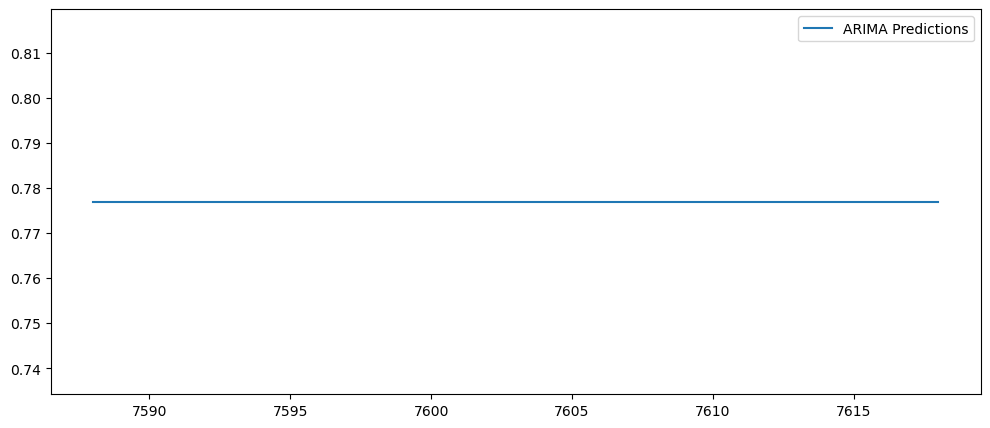

In [30]:
pred.plot(figsize=(12,5),legend=True)

# Part 2: Model Building - ARIMA

### 1.	Parameter Selection for ARIMA:

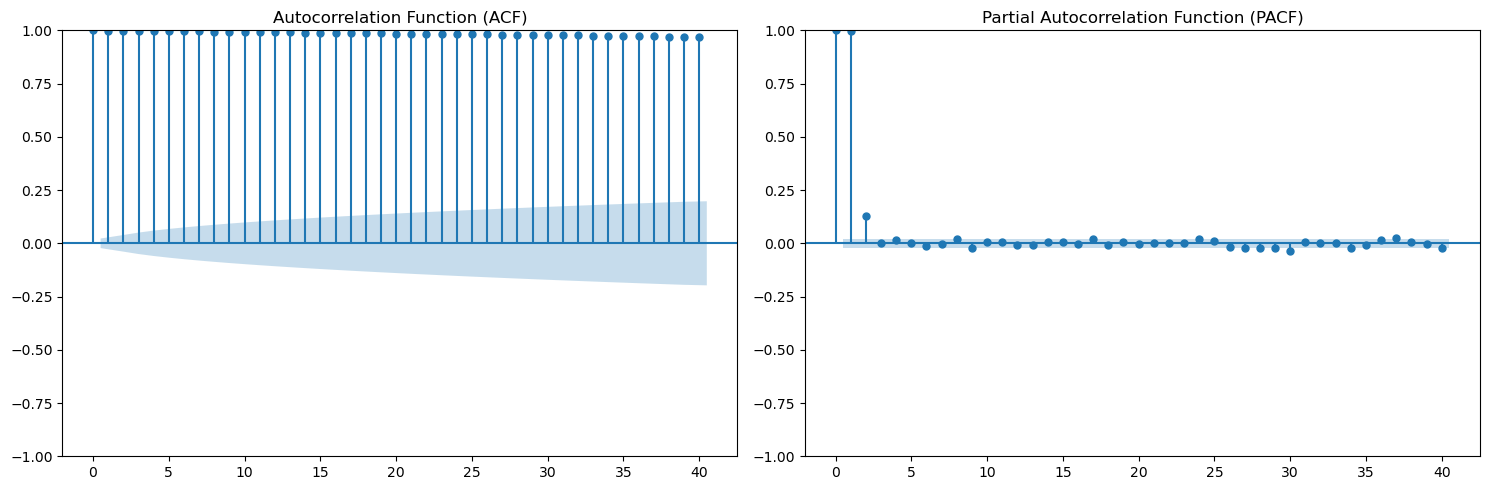

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' and 'train' are defined as in the original code

# Plot ACF and PACF for the training data
fig, axes = plt.subplots(1, 2, figsize=(15,5))

plot_acf(train['Ex_rate'], ax=axes[0], lags=40)  # Adjust 'lags' as needed
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(train['Ex_rate'], ax=axes[1], lags=40) # Adjust 'lags' as needed
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


### 2.	Model Fitting: 

In [32]:
# Assuming optimal parameters (p, d, q) have been determined from ACF/PACF plots or other methods
# Replace (1,1,0) with the best parameters
p, d, q = 1, 1, 0  # Example parameters
model = ARIMA(train['Ex_rate'], order=(p, d, q))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Sat, 26 Apr 2025   AIC                         -55864.938
Time:                        11:50:17   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.	Diagnostics: 

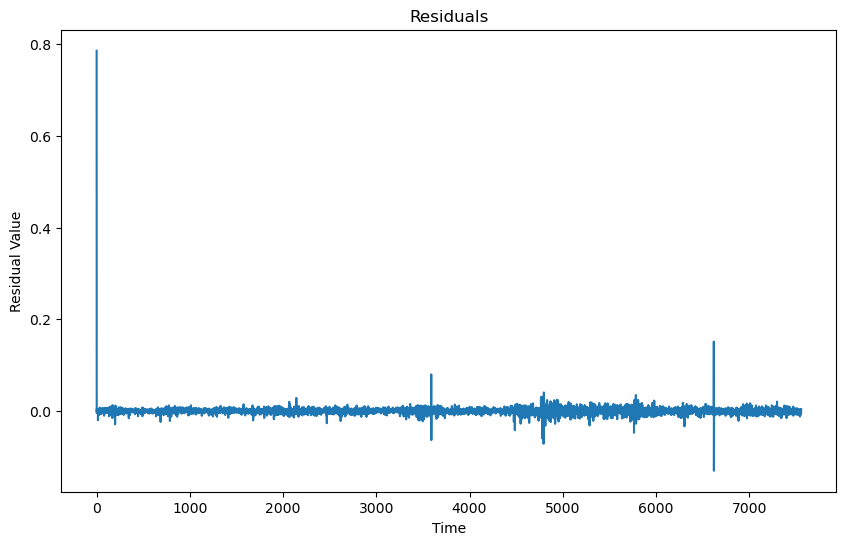

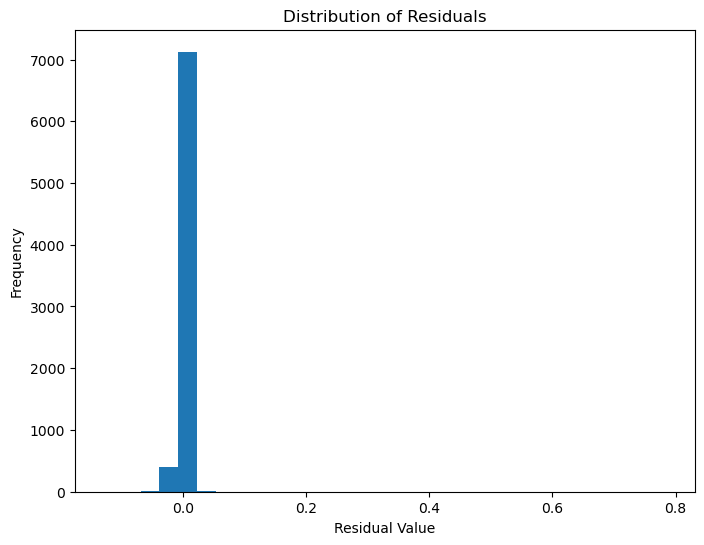

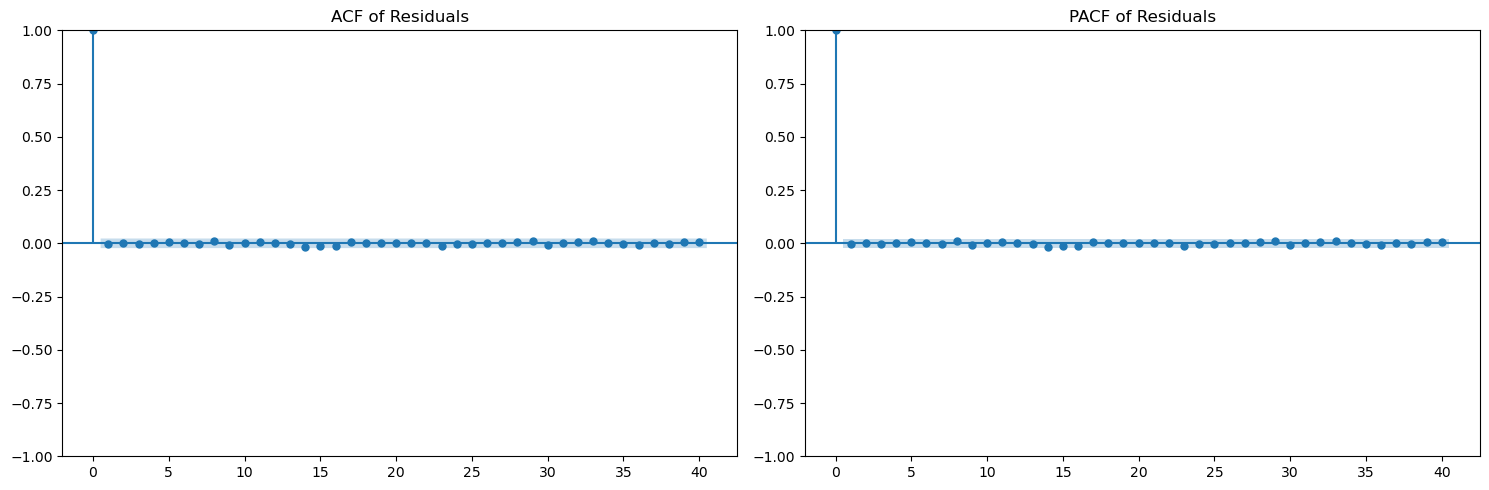

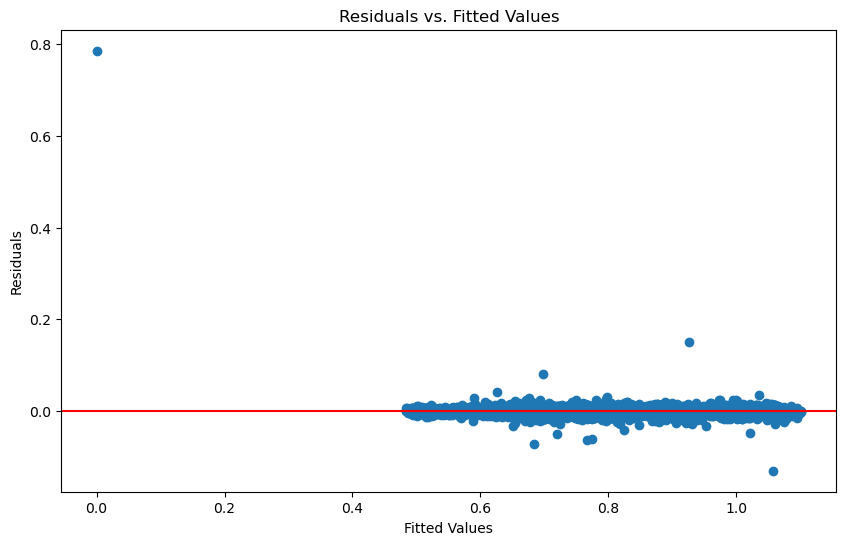

,lb_stat,lb_pvalue
1,0.081810,0.774860
2,0.151832,0.926894
3,0.340895,0.952162
4,0.341943,0.986948
5,0.520739,0.991344
6,0.540493,0.997310
7,0.629783,0.998819
8,1.443077,0.993613
9,1.789713,0.994373
10,1.792598,0.997697


In [33]:
import matplotlib.pyplot as plt
# Calculate residuals
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(residuals, ax=axes[0], lags=40)
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1], lags=40)
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Check for heteroskedasticity (non-constant variance) using a plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()


# Further analysis (optional):
# - Durbin-Watson test for autocorrelation in residuals
# - Ljung-Box test for autocorrelation in residuals
# - Check for normality of residuals using Q-Q plots or statistical tests


from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=40)  # Specify the number of lags to test

# Print the test results
lb_test

# Assess if p-values are greater than a significance level(e.g., 0.05), suggesting there is no residual autocorrelation




### Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).


# Part 3: Model Building - Exponential Smoothing

### 1.	Model Selection: 

Holt's Linear Trend RMSE: 0.015454514953386133


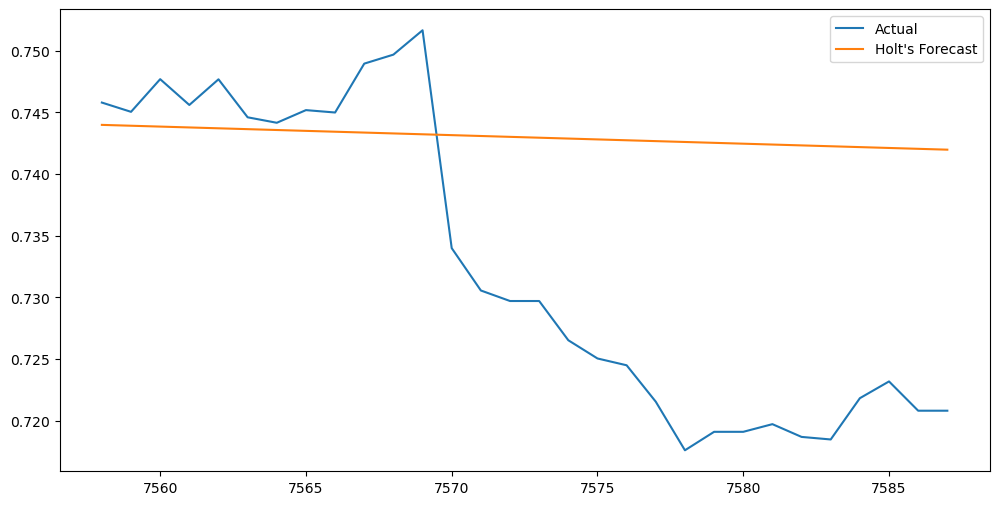

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Assuming 'train' and 'test' DataFrames are already defined and contain the 'Ex_rate' column
# as demonstrated in the provided code.

# Choose an appropriate Exponential Smoothing model based on time series characteristics
# Simple Exponential Smoothing (SES): Suitable for data with no trend or seasonality.
# Holt's Linear Trend Model:  Suitable for data with a trend but no seasonality.
# Holt-Winters' Method: Suitable for data with both trend and seasonality.

# Example: Holt's Linear Trend Model
model_holt = Holt(train['Ex_rate']).fit()  # Fit the model to the training data

# Forecast on the test set
forecast_holt = model_holt.forecast(steps=len(test))

# Example evaluation
rmse_holt = sqrt(mean_squared_error(test['Ex_rate'], forecast_holt))
print(f"Holt's Linear Trend RMSE: {rmse_holt}")

# Alternatively, you can use SimpleExpSmoothing or ExponentialSmoothing with appropriate settings:

# Example: Simple Exponential Smoothing
# model_ses = SimpleExpSmoothing(train['Ex_rate']).fit()
# forecast_ses = model_ses.forecast(steps=len(test))
# rmse_ses = sqrt(mean_squared_error(test['Ex_rate'], forecast_ses))
# print(f"Simple Exponential Smoothing RMSE: {rmse_ses}")


# Example: Holt-Winters' Method (Additive or Multiplicative Seasonality)
# model_hw = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()
# # OR
# # model_hw = ExponentialSmoothing(train['Ex_rate'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# forecast_hw = model_hw.forecast(steps=len(test))
# rmse_hw = sqrt(mean_squared_error(test['Ex_rate'], forecast_hw))
# print(f"Holt-Winters' RMSE: {rmse_hw}")


# Visualization (Optional)
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'], label='Actual')
plt.plot(forecast_holt, label="Holt's Forecast")
# plt.plot(forecast_ses, label="SES Forecast")
# plt.plot(forecast_hw, label="Holt-Winters' Forecast")
plt.legend()
plt.show()


### 2.	Parameter Optimization: 

ARIMA(0, 0, 0) - AIC:-8610.898, RMSE:0.046
ARIMA(0, 0, 1) - AIC:-18551.698, RMSE:0.046
ARIMA(0, 0, 2) - AIC:-26604.252, RMSE:0.045
ARIMA(0, 1, 0) - AIC:-55734.690, RMSE:0.017
ARIMA(0, 1, 1) - AIC:-55863.387, RMSE:0.017
ARIMA(0, 1, 2) - AIC:-55862.494, RMSE:0.017
ARIMA(1, 0, 0) - AIC:-55736.496, RMSE:0.017
ARIMA(1, 0, 1) - AIC:-55864.241, RMSE:0.017
ARIMA(1, 0, 2) - AIC:-55863.423, RMSE:0.017
ARIMA(1, 1, 0) - AIC:-55864.938, RMSE:0.017
ARIMA(1, 1, 1) - AIC:-55862.942, RMSE:0.017
ARIMA(1, 1, 2) - AIC:-55862.179, RMSE:0.017
ARIMA(2, 0, 0) - AIC:-55865.882, RMSE:0.017
ARIMA(2, 0, 1) - AIC:-55863.883, RMSE:0.017


C:\DataScience\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:-55863.055, RMSE:0.017
ARIMA(2, 1, 0) - AIC:-55862.941, RMSE:0.017


C:\DataScience\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\DataScience\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 1) - AIC:-55860.936, RMSE:0.017


C:\DataScience\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:-55860.709, RMSE:0.017

Best ARIMA model (based on AIC):
   Parameters           AIC      RMSE
12  (2, 0, 0) -55865.882359  0.017036

Best ARIMA Model RMSE: 0.017


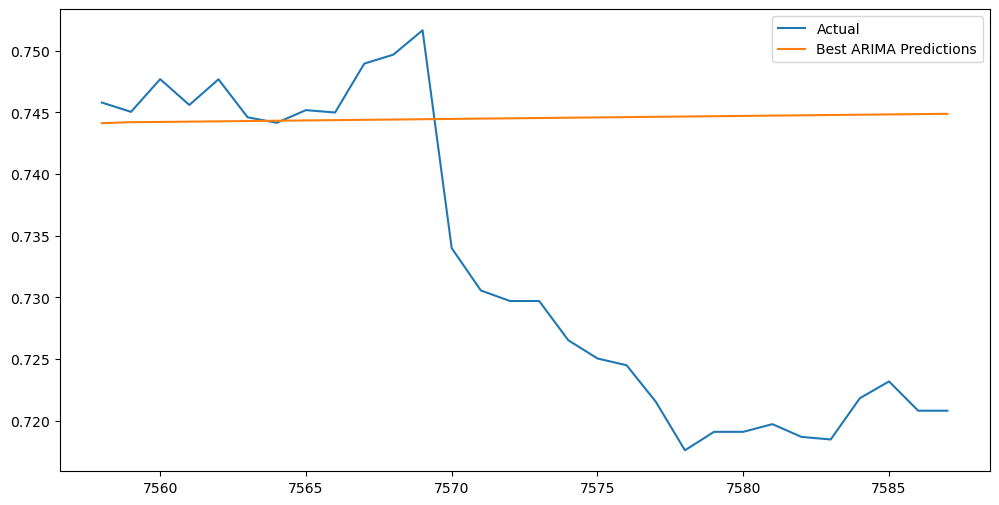

Exponential Smoothing (trend=add, seasonal=add, sp=12) - AIC:-77299.954, RMSE:0.017
Exponential Smoothing (trend=add, seasonal=mul, sp=12) - AIC:-77299.918, RMSE:0.017
Exponential Smoothing (trend=add, seasonal=None, sp=12) - AIC:-77316.487, RMSE:0.016
Exponential Smoothing (trend=mul, seasonal=add, sp=12) - AIC:-77300.082, RMSE:0.016


C:\DataScience\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Exponential Smoothing (trend=mul, seasonal=mul, sp=12) - AIC:-77300.057, RMSE:0.016
Exponential Smoothing (trend=mul, seasonal=None, sp=12) - AIC:-77316.625, RMSE:0.016
Exponential Smoothing (trend=None, seasonal=add, sp=12) - AIC:-77303.947, RMSE:0.017
Exponential Smoothing (trend=None, seasonal=mul, sp=12) - AIC:-77303.906, RMSE:0.017
Exponential Smoothing (trend=None, seasonal=None, sp=12) - AIC:-77320.479, RMSE:0.017

Best Exponential Smoothing model (based on AIC):
         Parameters           AIC      RMSE
0  (None, None, 12) -77320.479209  0.016583

Best Exponential Smoothing Model RMSE: 0.017


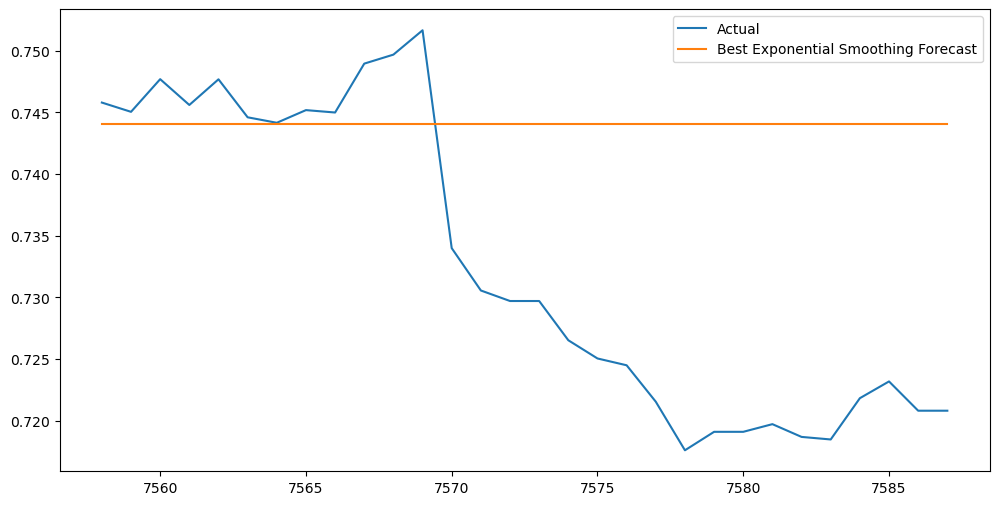

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from itertools import product

# Grid Search for ARIMA hyperparameters

# Define the p, d, and q ranges to explore
p = range(0, 3)  # Example: explore p values from 0 to 2
d = range(0, 2)  # Example: explore d values from 0 to 1
q = range(0, 3)  # Example: explore q values from 0 to 2

# Generate all possible combinations of p, d, and q
pdq = list(product(p, d, q))

# Store results for each combination
results_arima = []

for param in pdq:
  try:
    model = ARIMA(train['Ex_rate'], order=param)
    model_fit = model.fit()
    rmse = sqrt(mean_squared_error(test['Ex_rate'], model_fit.predict(start=len(train), end=len(train)+len(test)-1)))
    results_arima.append([param, model_fit.aic, rmse])
    print(f"ARIMA{param} - AIC:{model_fit.aic:.3f}, RMSE:{rmse:.3f}") # Print each iteration's results
  except:
    continue


# Find the best model based on AIC or RMSE
results_arima_df = pd.DataFrame(results_arima, columns=['Parameters', 'AIC', 'RMSE'])

# Sort by AIC (lower is better)
results_arima_df = results_arima_df.sort_values(by='AIC', ascending=True)


# Display the best parameters based on AIC
print("\nBest ARIMA model (based on AIC):")
print(results_arima_df.head(1))


best_arima_params = results_arima_df.iloc[0,0]

#Refit model with best parameters
best_arima = ARIMA(train['Ex_rate'], order=best_arima_params)
best_arima_fit = best_arima.fit()


# Predictions
arima_predictions = best_arima_fit.predict(start=len(train), end=len(train) + len(test) - 1)


# Evaluation metrics
rmse_best = sqrt(mean_squared_error(test['Ex_rate'], arima_predictions))
print(f"\nBest ARIMA Model RMSE: {rmse_best:.3f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'], label='Actual')
plt.plot(arima_predictions, label='Best ARIMA Predictions')
plt.legend()
plt.show()



# Example using AIC for Exponential Smoothing
# Define parameter ranges for trend and seasonal components
trend_types = ['add', 'mul', None]
seasonal_types = ['add', 'mul', None]
seasonal_periods = [12]  # Assuming yearly seasonality

# Generate all combinations of parameters
model_params = list(product(trend_types, seasonal_types, seasonal_periods))

# Store results
results_es = []

for params in model_params:
    try:
        trend, seasonal, sp = params
        model = ExponentialSmoothing(train['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=sp)
        model_fit = model.fit()
        rmse = np.sqrt(mean_squared_error(test['Ex_rate'], model_fit.forecast(len(test))))
        results_es.append([params, model_fit.aic, rmse])
        print(f"Exponential Smoothing (trend={trend}, seasonal={seasonal}, sp={sp}) - AIC:{model_fit.aic:.3f}, RMSE:{rmse:.3f}")
    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        continue

# Create a DataFrame from the results
results_es_df = pd.DataFrame(results_es, columns=['Parameters', 'AIC', 'RMSE'])
results_es_df = results_es_df.sort_values('AIC').reset_index(drop=True)

print("\nBest Exponential Smoothing model (based on AIC):")
print(results_es_df.head(1))

# Best parameters based on lowest AIC
best_params = results_es_df.loc[0, "Parameters"]

#Refit Model with best parameters
best_exp_smooth = ExponentialSmoothing(train['Ex_rate'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2]).fit()

#Forecast
exp_predictions = best_exp_smooth.forecast(len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], exp_predictions))
print(f"\nBest Exponential Smoothing Model RMSE: {rmse:.3f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'], label='Actual')
plt.plot(exp_predictions, label="Best Exponential Smoothing Forecast")
plt.legend()
plt.show()


### 3.	Model Fitting and Forecasting: 

Holt's Linear Trend RMSE: 0.015454514953386133


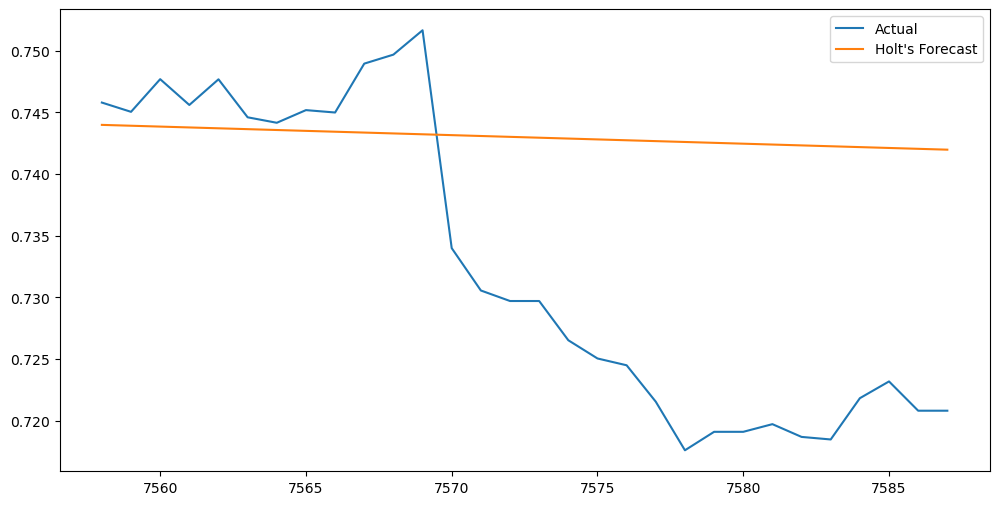

In [36]:
import matplotlib.pyplot as plt
# Assuming 'train' and 'test' DataFrames are already defined and contain the 'Ex_rate' column
# as demonstrated in the provided code.

# Choose an appropriate Exponential Smoothing model based on time series characteristics
# Simple Exponential Smoothing (SES): Suitable for data with no trend or seasonality.
# Holt's Linear Trend Model:  Suitable for data with a trend but no seasonality.
# Holt-Winters' Method: Suitable for data with both trend and seasonality.

# Example: Holt's Linear Trend Model
model_holt = Holt(train['Ex_rate']).fit()  # Fit the model to the training data

# Forecast on the test set
forecast_holt = model_holt.forecast(steps=len(test))

# Example evaluation
rmse_holt = sqrt(mean_squared_error(test['Ex_rate'], forecast_holt))
print(f"Holt's Linear Trend RMSE: {rmse_holt}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'], label='Actual')
plt.plot(forecast_holt, label="Holt's Forecast")
plt.legend()
plt.show()


# Part 4: Evaluation and Comparison

### 1.	Compute Error Metrics: 

In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, RMSE, and MAPE for ARIMA model
mae_arima = mean_absolute_error(test['Ex_rate'], arima_predictions)
rmse_arima = np.sqrt(mean_squared_error(test['Ex_rate'], arima_predictions))
mape_arima = np.mean(np.abs((test['Ex_rate'] - arima_predictions) / test['Ex_rate'])) * 100

print(f"ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")

# Calculate MAE, RMSE, and MAPE for Exponential Smoothing model
mae_exp = mean_absolute_error(test['Ex_rate'], exp_predictions)
rmse_exp = np.sqrt(mean_squared_error(test['Ex_rate'], exp_predictions))
mape_exp = np.mean(np.abs((test['Ex_rate'] - exp_predictions) / test['Ex_rate'])) * 100

print(f"Exponential Smoothing - MAE: {mae_exp:.2f}, RMSE: {rmse_exp:.2f}, MAPE: {mape_exp:.2f}%")


ARIMA - MAE: 0.01, RMSE: 0.02, MAPE: 1.90%
Exponential Smoothing - MAE: 0.01, RMSE: 0.02, MAPE: 1.86%


### 2.	Model Comparison and 3.	Conclusion: 